In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [22]:
#create graph of total delays for that route
#create graph of percentage of delays for that route
# Open and read files
flight_delay_dest = pd.read_csv("data/clean/LAX_Dest_Flight_Delays_2016.csv")

In [23]:
# retrive and conver in to dataframe
flight_delay_dest = pd.DataFrame(flight_delay_dest)

In [24]:
flight_delay_dest.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'Carrier', 'TailNum', 'FlightNum', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'OriginWac', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CarrierName'],
      dtype='object')

In [25]:
flight_delay_dest.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,TailNum,FlightNum,...,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierName
0,2016,1,1,1,5,2016-01-01,AA,AA,N850AA,58,...,264.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
1,2016,1,1,2,6,2016-01-02,AA,AA,N855AA,58,...,281.0,1.0,2504.0,11,0.0,0.0,0.0,24.0,8.0,American Airlines Inc.
2,2016,1,1,3,7,2016-01-03,AA,AA,N864AA,58,...,262.0,1.0,2504.0,11,30.0,0.0,0.0,0.0,6.0,American Airlines Inc.
3,2016,1,1,4,1,2016-01-04,AA,AA,N862AA,58,...,261.0,1.0,2504.0,11,1272.0,0.0,11.0,0.0,15.0,American Airlines Inc.
4,2016,1,1,5,2,2016-01-05,AA,AA,N859AA,58,...,251.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [26]:
city_origin = flight_delay_dest['OriginCityName'].value_counts()
city_origin = city_origin.reset_index().sort_values(['index'])
city_origin = city_origin.rename(columns={"index":"Origin City Name" , "OriginCityName":"Number of Flights"})
city_origin.head()

,Origin City Name,Number of Flights
44,"Albuquerque, NM",1189
55,"Anchorage, AK",523
51,"Aspen, CO",671
8,"Atlanta, GA",6453
24,"Austin, TX",2891


In [27]:
origin_flight_delays = flight_delay_dest['DepDel15'].value_counts()
origin_flight_delays

0.0    170538
1.0     40168
Name: DepDel15, dtype: int64

In [28]:
grouped_delays = flight_delay_dest.groupby(['OriginCityName']).sum()
grouped_delays

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightNum,OriginWac,DestWac,CRSDepTime,DepTime,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
OriginCityName,,,,,,,,,,,,,,,,,,,,,
"Albuquerque, NM",2397024,2966,7673,18899,4669,3443699,102254,108199,1508342,1519772.0,...,146081.0,116755.0,1189.0,804953.0,3567,4239.0,460.0,4701.0,14.0,5865.0
"Anchorage, AK",1054368,1333,3491,8270,2147,118361,523,47593,1113135,1047736.0,...,161666.0,148903.0,523.0,1226435.0,5230,1136.0,0.0,761.0,0.0,424.0
"Aspen, CO",1352736,1479,3846,10995,2820,3469821,55022,61061,798246,811855.0,...,90307.0,70658.0,671.0,494527.0,2013,1737.0,871.0,3463.0,0.0,6295.0
"Atlanta, GA",13009248,16212,42148,101530,25629,9706026,219402,587223,8673040,8762696.0,...,1868982.0,1660705.0,6453.0,12559609.0,51624,25886.0,2941.0,18522.0,94.0,15553.0
"Austin, TX",5828256,7290,19002,45646,11370,7132962,213934,263081,3486005,3499557.0,...,571181.0,493862.0,2891.0,3590622.0,14455,9990.0,708.0,8073.0,114.0,11231.0
"Baltimore, MD",3878784,5101,13378,30298,7539,2209241,67340,175084,2189463,2221691.0,...,648118.0,592991.0,1924.0,4480996.0,19240,7678.0,1287.0,7120.0,3.0,6373.0
"Bend/Redmond, OR",423360,691,1889,3326,846,635626,19320,19110,136406,139912.0,...,30146.0,21749.0,210.0,152460.0,630,1415.0,602.0,1217.0,0.0,0.0
"Boise, ID",1231776,1723,4604,9863,2471,3178526,50713,55601,718081,727470.0,...,84460.0,65241.0,611.0,411814.0,1833,2876.0,188.0,2404.0,0.0,4711.0
"Boston, MA",9211104,11655,30360,72186,18055,3448848,59397,415779,6006429,6055393.0,...,1741401.0,1588629.0,4569.0,11929659.0,50259,15998.0,2886.0,15465.0,167.0,14182.0


In [29]:
delays = grouped_delays['DepDel15']
delays = delays.reset_index()
delays = delays.rename(columns={"OriginCityName": "Origin City Name"})

In [30]:
merged_df = city_origin.merge(delays, on="Origin City Name")
merged_df.head()

,Origin City Name,Number of Flights,DepDel15
0,"Albuquerque, NM",1189,211.0
1,"Anchorage, AK",523,34.0
2,"Aspen, CO",671,167.0
3,"Atlanta, GA",6453,1237.0
4,"Austin, TX",2891,391.0


In [31]:
merged_df["Flight Delay Percentage"] = (merged_df["DepDel15"]/merged_df["Number of Flights"])*100
Flight_Delay_Percentage = merged_df[["Origin City Name", "Number of Flights", "DepDel15", "Flight Delay Percentage"]]
Flight_Delay_Percentage

,Origin City Name,Number of Flights,DepDel15,Flight Delay Percentage
0,"Albuquerque, NM",1189,211.0,17.746005
1,"Anchorage, AK",523,34.0,6.500956
2,"Aspen, CO",671,167.0,24.888227
3,"Atlanta, GA",6453,1237.0,19.169379
4,"Austin, TX",2891,391.0,13.524732
5,"Baltimore, MD",1924,430.0,22.349272
6,"Bend/Redmond, OR",210,26.0,12.380952
7,"Boise, ID",611,121.0,19.803601
8,"Boston, MA",4569,850.0,18.603633
9,"Bozeman, MT",164,25.0,15.243902


In [32]:
Flight_Delay_Percentage.dtypes

Origin City Name            object
Number of Flights            int64
DepDel15                   float64
Flight Delay Percentage    float64
dtype: object

In [33]:
Sorted_FDP = Flight_Delay_Percentage[Flight_Delay_Percentage["Number of Flights"] >= 200]
Sorted_FDP = Sorted_FDP.reset_index(drop = True)
Sorted_FDP

,Origin City Name,Number of Flights,DepDel15,Flight Delay Percentage
0,"Albuquerque, NM",1189,211.0,17.746005
1,"Anchorage, AK",523,34.0,6.500956
2,"Aspen, CO",671,167.0,24.888227
3,"Atlanta, GA",6453,1237.0,19.169379
4,"Austin, TX",2891,391.0,13.524732
5,"Baltimore, MD",1924,430.0,22.349272
6,"Bend/Redmond, OR",210,26.0,12.380952
7,"Boise, ID",611,121.0,19.803601
8,"Boston, MA",4569,850.0,18.603633
9,"Charlotte, NC",2118,432.0,20.396601


In [34]:
High_Average = Sorted_FDP[Sorted_FDP["Flight Delay Percentage"] >= 25]
High_Average= High_Average.reset_index(drop = True)
High_Average

,Origin City Name,Number of Flights,DepDel15,Flight Delay Percentage
0,"Fort Lauderdale, FL",1917,495.0,25.821596
1,"Jackson, WY",315,79.0,25.079365
2,"Newark, NJ",5461,1384.0,25.343344
3,"Raleigh/Durham, NC",818,212.0,25.916870


/Users/nicholasroach/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicholasroach/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


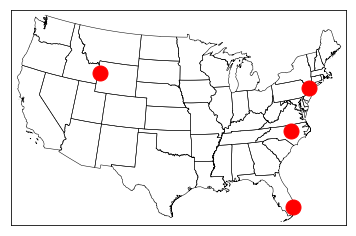

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

cities = [["Fort Lauderdale",10],
          ["Jackson, WY",10],
          ["Newark",10],
          ["Raleigh",10]]
         
scale = 5
          

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()
plt.savefig("City Delays")
